In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pickle

In [2]:
with open('../results/histograms.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
histograms = data['histograms']
all_stationarity_regions = data['all_stationarity_regions']
histograms["NCC-UCRL2"] = histograms["Algorithm1"]

In [4]:
N_STATIONARY_PERIODS = len(all_stationarity_regions)

In [5]:
algs_to_plot = ["Oracle", "NCC-UCRL2", "PSLinUCB"]
colors = ['cyan', 'red', 'blue']

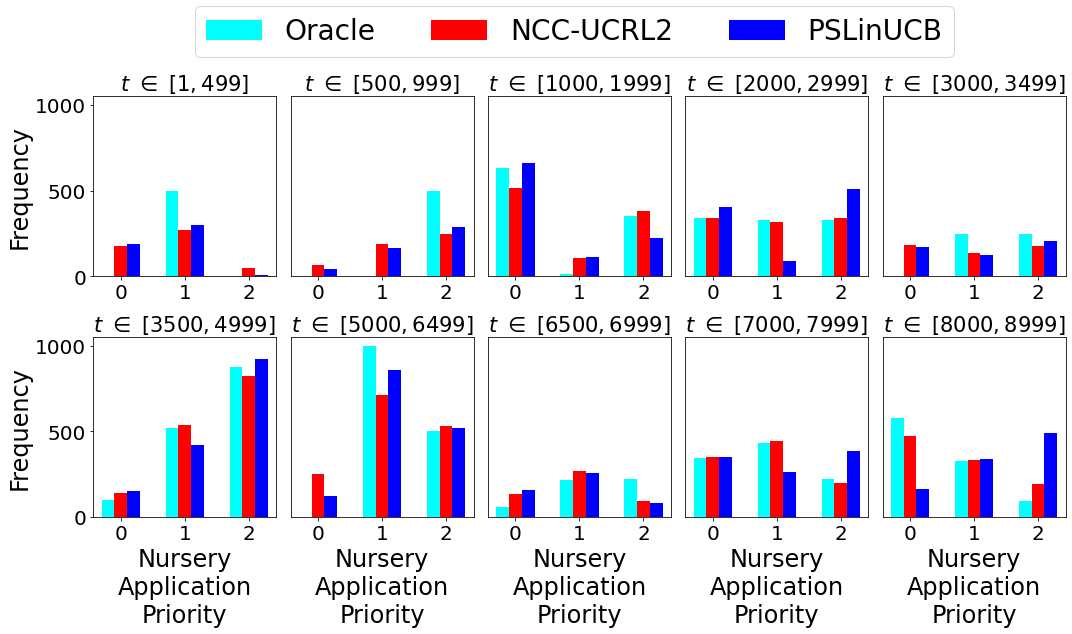

In [6]:
fig, axs = plt.subplots(2, math.floor(N_STATIONARY_PERIODS/2), figsize=(15, 8))

x = np.array([0, 1, 2])

handles = []
for period_num, ax in enumerate(axs.flatten()):
    if period_num >= N_STATIONARY_PERIODS:
        break
    for alg_num, alg_name in enumerate(algs_to_plot):
        
        bar = ax.bar(-0.2 + x+alg_num*0.2,
               histograms[alg_name][period_num, :],
               width=0.2,
               color=colors[alg_num],
               label=alg_name,
        )
        period = all_stationarity_regions[period_num]
        ax.set_title(fr"$t\ \in \ [{period[0]}, {period[1]-1}]$", fontsize=21)
        if period_num == 0:
            handles.append(bar)
        ax.set_ylim(0, 1050)
        
        ax.tick_params(labelsize=20)
        ax.tick_params(labelsize=20)
    
    if period_num != 0 and period_num != math.floor(N_STATIONARY_PERIODS/2):
        # For all subplots apart from the leftmost ones
        ax.get_yaxis().set_visible(False)
    else:
        ax.set_ylabel('Frequency', fontsize=24)
        
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Only integer labels
    
    
    if period_num >= math.floor(N_STATIONARY_PERIODS/2):
        # For all subplots in the lower row
        ax.set_xlabel("Nursery\nApplication\nPriority", fontsize=24)
        


fig.legend(handles, algs_to_plot, loc="upper center",  bbox_to_anchor=(0.535, 1.12), ncol=3, prop={'size': 28})
plt.tight_layout()


plt.savefig('nursery_arms_histogram.pdf', bbox_inches='tight')
plt.show()